# Coherence Scores and Similarities

Check correlations between coherence score metrics and cosine similarities.

Check preference agreement between coherence score metrics and cosine similarities.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load Combined_Data.xlsx
combined_data = pd.read_excel('Combined_Data.xlsx')

# Get column names
print(combined_data.columns)


Index(['model_task_method', 'conversation_number',
       'coherence_1_incoherent_10_very_coherent',
       'task_constraints_followed_0_not_followed_1_followed',
       'ease_of_review_1_easy_10_hard', 'correct',
       'Prediction_Based_On_First_10', 'Prediction_Based_On_Last_10',
       'Aggregated_Prediction', 'Prediction_Based_On_First_10_LP',
       'response_Based_On_First_10_LP', 'Prediction_Based_On_Last_10_LP',
       'response_Based_On_Last_10_LP', 'response_LP',
       'Aggregated_Prediction_LP', 'Prediction_Based_On_First_50_LP',
       'response_Based_On_First_50_LP', 'Prediction_Based_On_Last_50_LP',
       'response_Based_On_Last_50_LP', 'Aggregated_Prediction_50_LP',
       'Prediction_Based_On_random_50_LP_1',
       'response_Based_On_random_50_LP_1',
       'Prediction_Based_On_random_50_LP_2',
       'response_Based_On_random_50_LP_2',
       'Aggregated_Prediction_random_50_LP', 'Unnamed: 0_x', 'response_x',
       'replace_slash_n_slash_n_with_newline_x',
       

### Scatterplots

In [58]:
# Coherence metrics
coherence_metrics = ['coherence_1_incoherent_10_very_coherent', 'task_constraints_followed_0_not_followed_1_followed', 'Aggregated_Prediction_random_50_LP', 'avg_cosine_sim', 'avg_inter_paragraph_cosine_sim']

# Scatterplot of all combinations
# Finding all combinations of the dataframe columns
cbs = list(combinations(coherence_metrics, 2))

# Plotting scatter plots for each combination
# for combo in cbs:
#     sns.scatterplot(data=combined_data, x=combo[0], y=combo[1])
#     plt.title(f'Scatter Plot of {combo[0]} vs {combo[1]}')
#     plt.show()


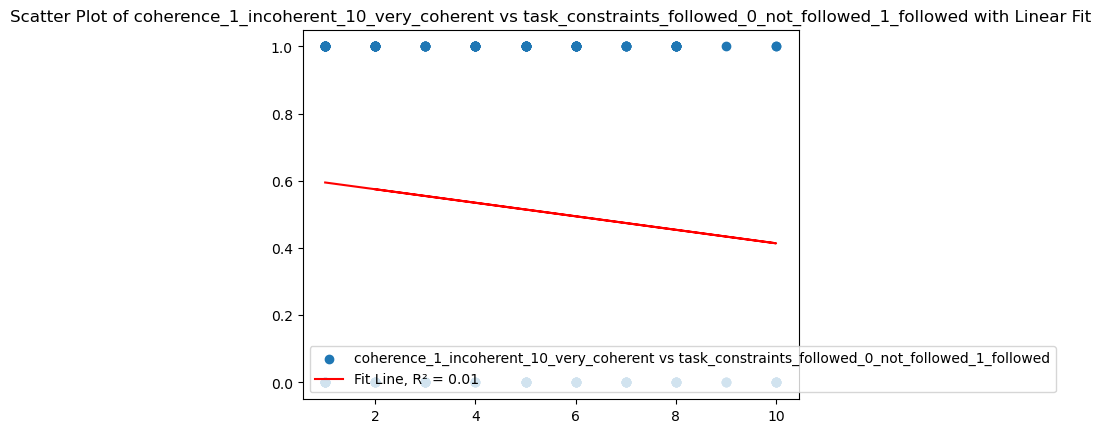

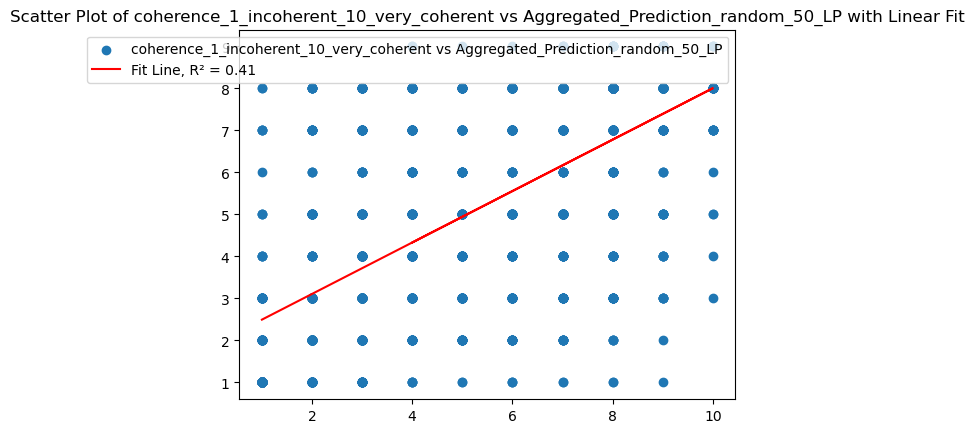

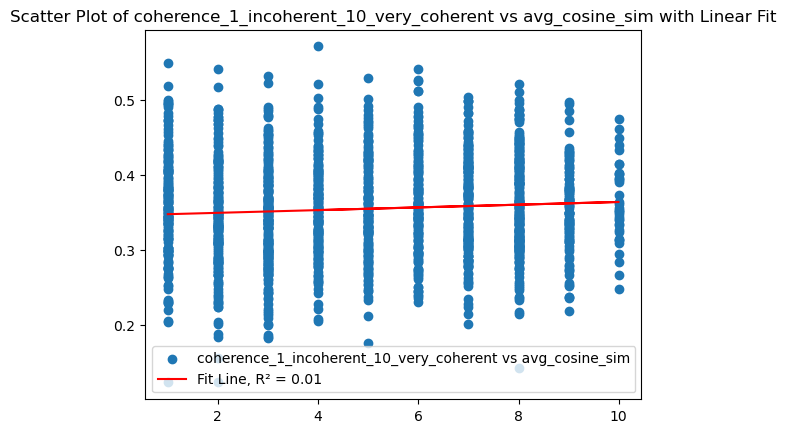

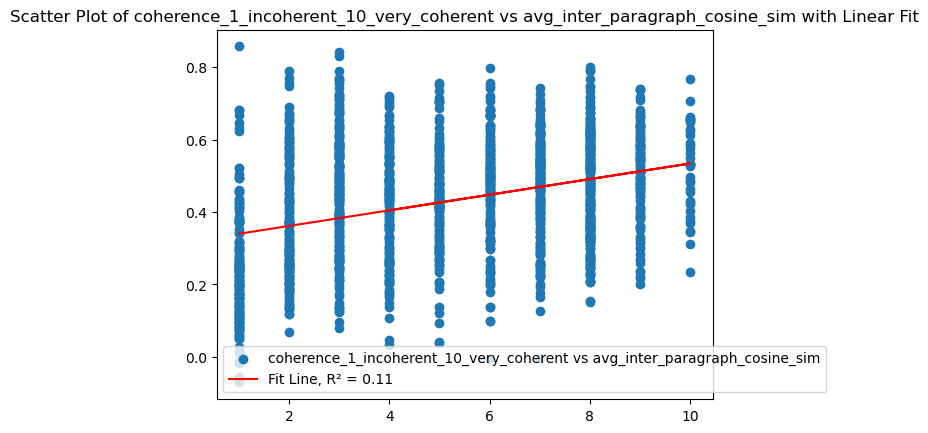

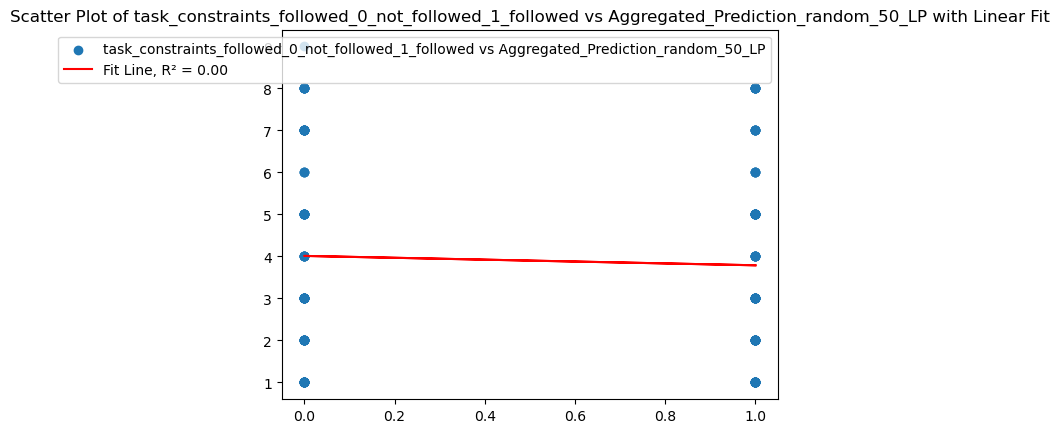

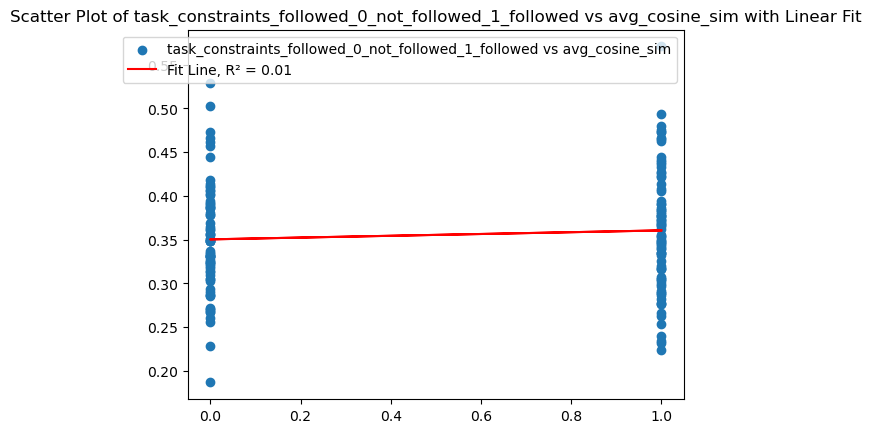

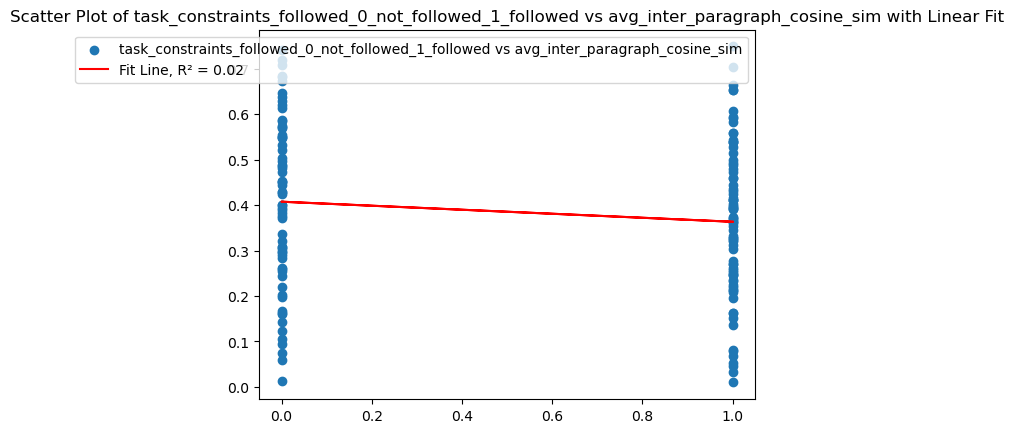

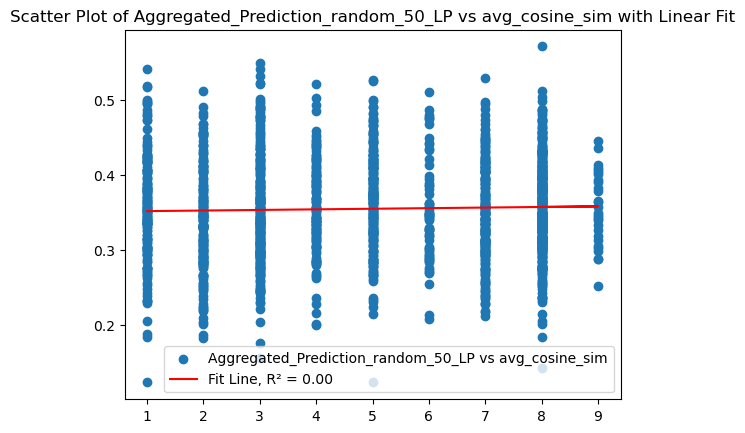

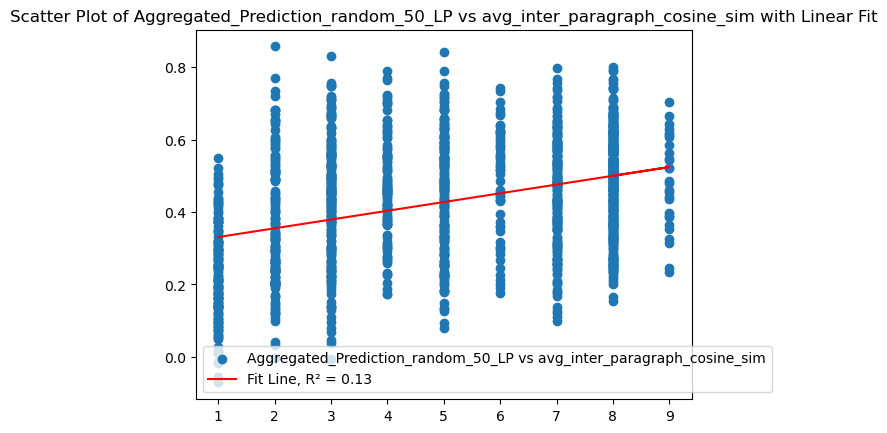

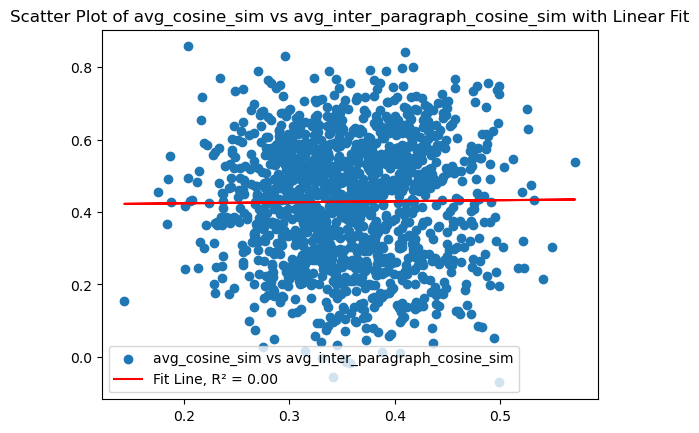

In [59]:
# Creating subplots for each combination
#fig, axs = plt.subplots(len(cbs), figsize=(8, 15))

for i, combo in enumerate(cbs):

    # Limit data to cases where both columns are not null
    limited_data = combined_data[combined_data[combo[0]].notnull() & combined_data[combo[1]].notnull()]

    # Preparing data
    x = limited_data[combo[0]].values.reshape(-1, 1)
    y = limited_data[combo[1]].values

    # Linear regression
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)

    # Calculating R-squared
    r2 = r2_score(y, y_pred)

    # Plotting
    plt.scatter(x, y, label=f'{combo[0]} vs {combo[1]}')
    plt.plot(x, y_pred, color='red', label=f'Fit Line, R² = {r2:.2f}')
    plt.title(f'Scatter Plot of {combo[0]} vs {combo[1]} with Linear Fit')
    #plt.set_title(f'Scatter Plot of {combo[0]} vs {combo[1]} with Linear Fit')
    plt.legend()
    plt.show()
    plt.close()

# plt.tight_layout()
# plt.show()


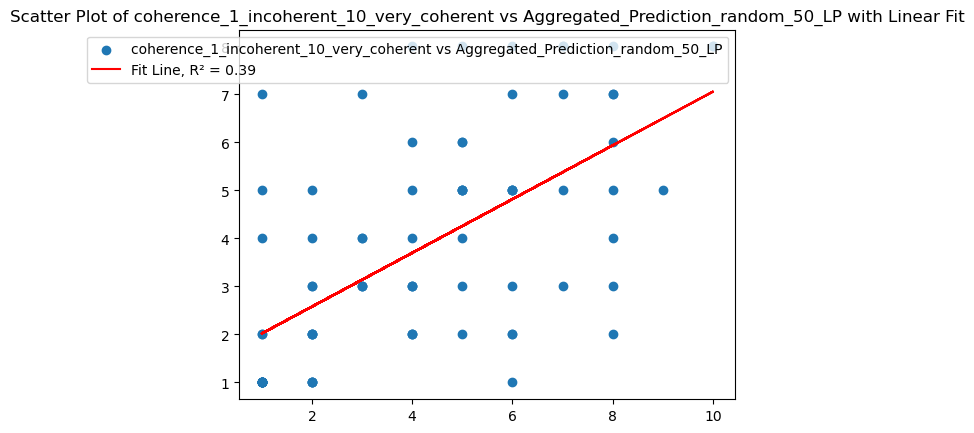

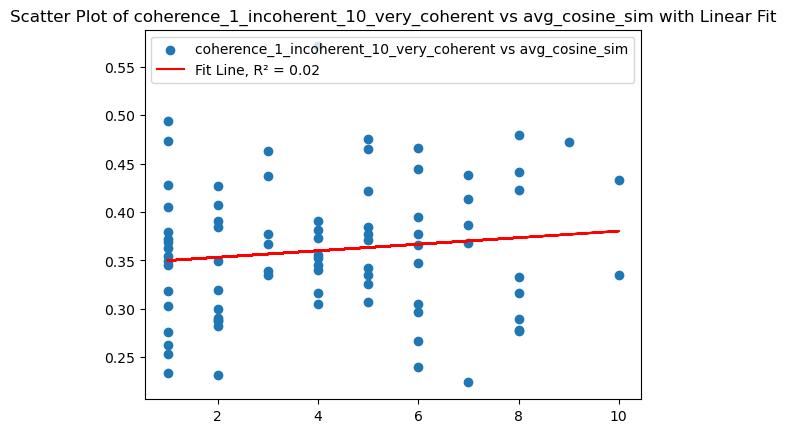

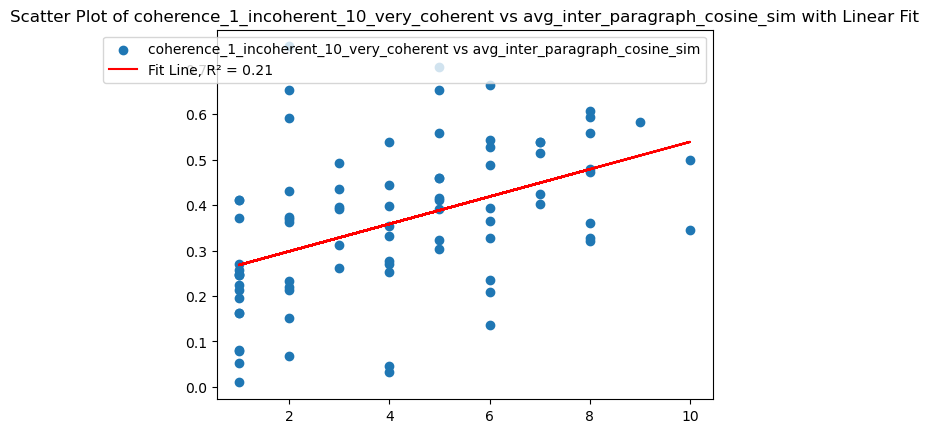

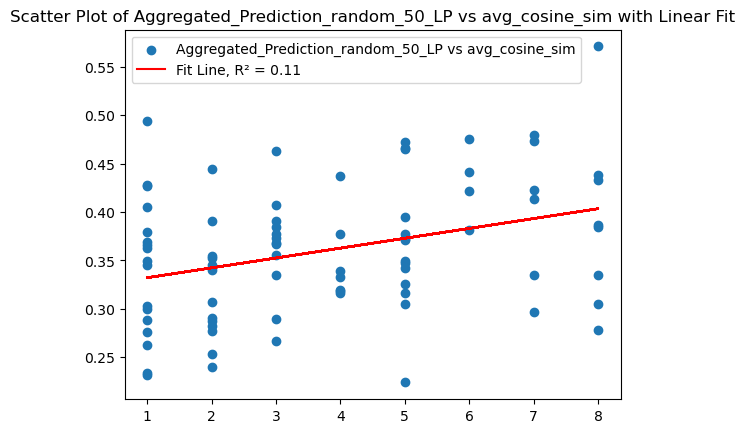

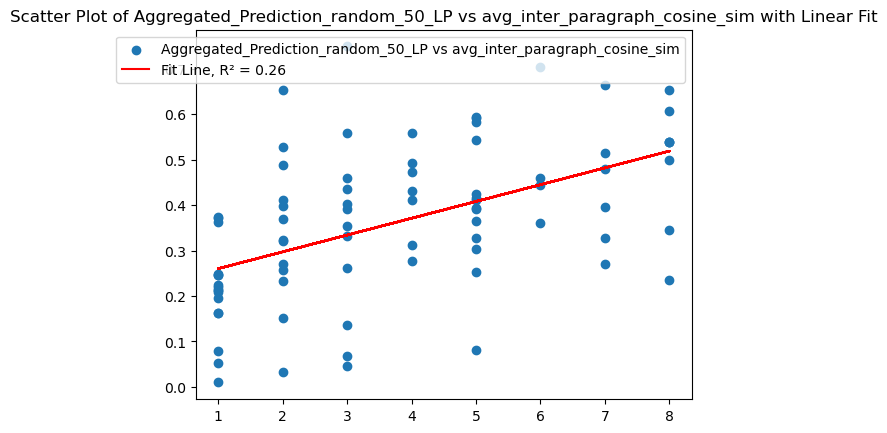

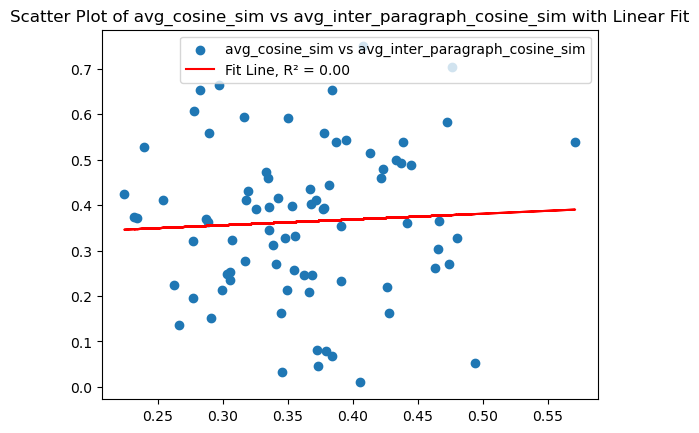

In [60]:
# Limit data to cases where both columns are not null AND compliant cases
new_metrics = ['coherence_1_incoherent_10_very_coherent', 'Aggregated_Prediction_random_50_LP', 'avg_cosine_sim', 'avg_inter_paragraph_cosine_sim']
new_cbs = list(combinations(new_metrics, 2))

for i, combo in enumerate(new_cbs):

    # Limit data to cases where both columns are not null
    limited_data = combined_data[combined_data[combo[0]].notnull() & combined_data[combo[1]].notnull() & combined_data['task_constraints_followed_0_not_followed_1_followed'] == 1]

    # Preparing data
    x = limited_data[combo[0]].values.reshape(-1, 1)
    y = limited_data[combo[1]].values

    # Linear regression
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)

    # Calculating R-squared
    r2 = r2_score(y, y_pred)

    # Plotting
    plt.scatter(x, y, label=f'{combo[0]} vs {combo[1]}')
    plt.plot(x, y_pred, color='red', label=f'Fit Line, R² = {r2:.2f}')
    plt.title(f'Scatter Plot of {combo[0]} vs {combo[1]} with Linear Fit')
    #plt.set_title(f'Scatter Plot of {combo[0]} vs {combo[1]} with Linear Fit')
    plt.legend()
    plt.show()
    plt.close()


In [61]:
# Compliance adjusted coherence matrics
coherence_metrics_compliance_adjusted = ['coherence_1_incoherent_10_very_coherent_compliance_adjusted', 'Aggregated_Prediction_random_50_LP_compliance_adjusted', 'avg_cosine_sim_compliance_adjusted', 'avg_inter_paragraph_cosine_sim_compliance_adjusted']

# Scatterplot of all combinations
# Finding all combinations of the dataframe columns
combinations_compliance_adjusted = list(combinations(coherence_metrics_compliance_adjusted, 2))

# # Plotting scatter plots for each combination
# for combo in combinations_compliance_adjusted:
#     sns.scatterplot(data=combined_data, x=combo[0], y=combo[1])
#     plt.title(f'Scatter Plot of {combo[0]} vs {combo[1]}')
#     plt.show()


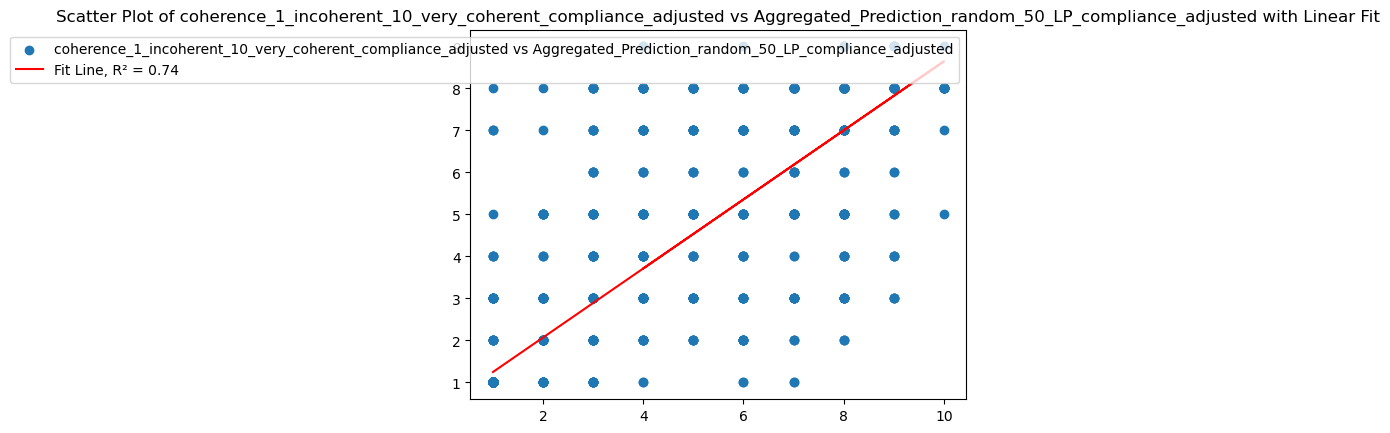

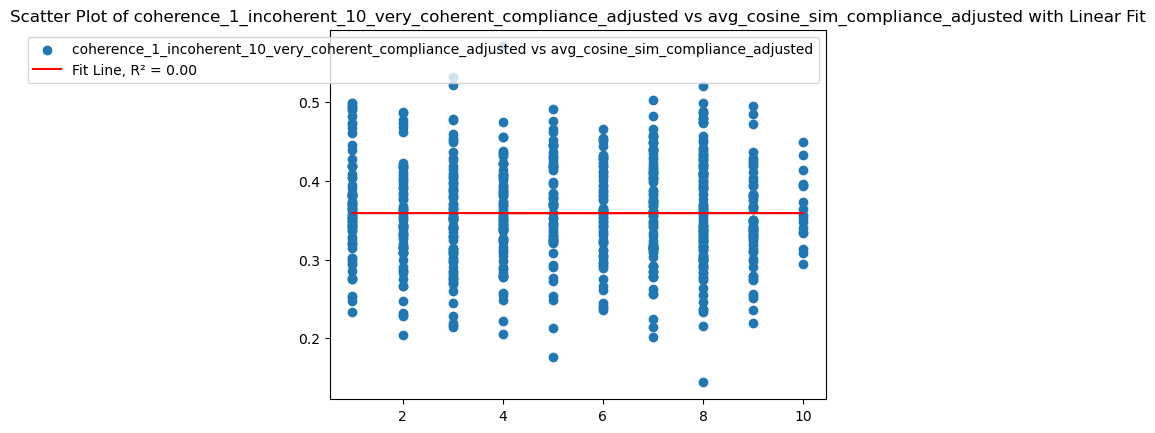

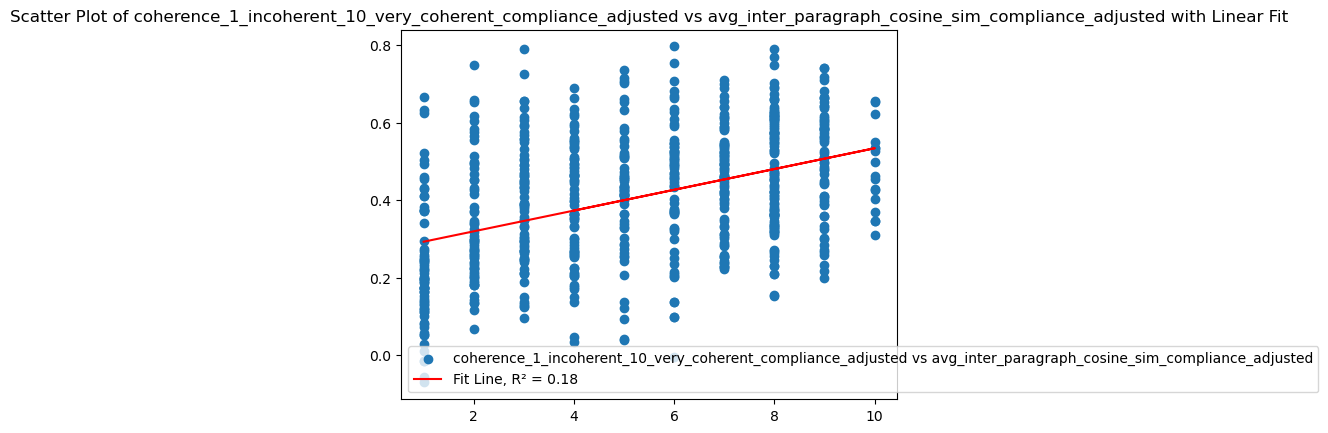

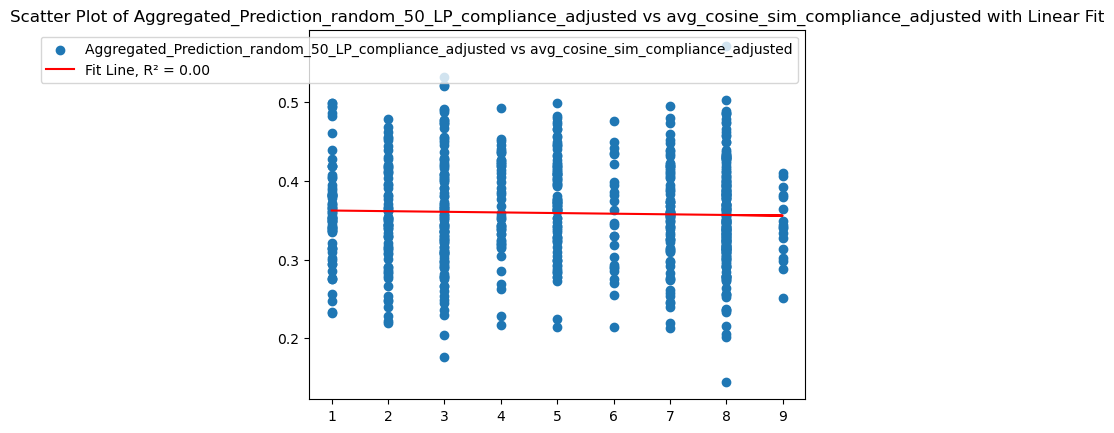

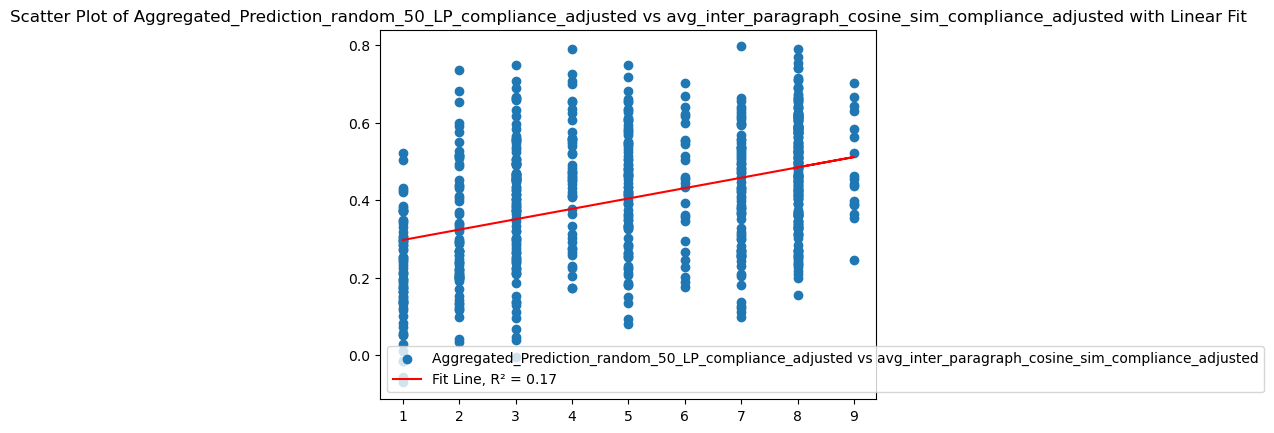

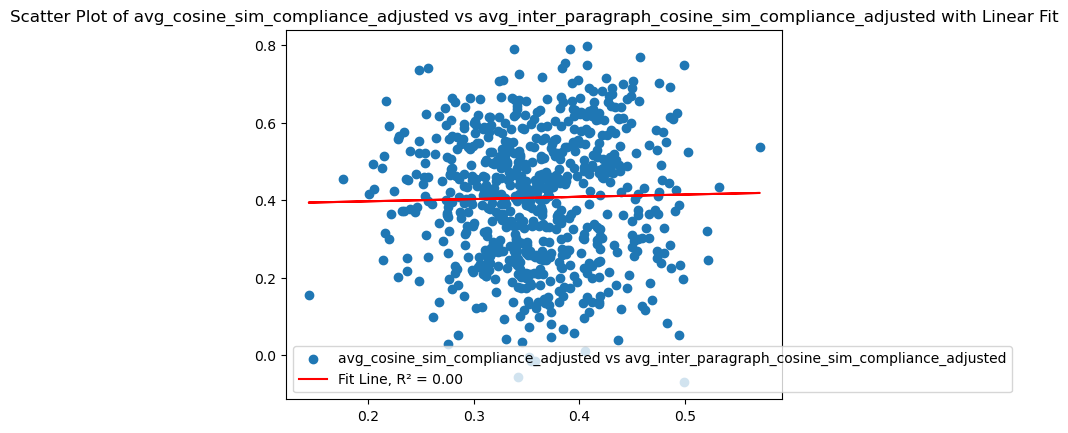

In [62]:
# Creating subplots for each combination
#fig, axs = plt.subplots(len(combinations_compliance_adjusted), figsize=(8, 15))

# Limit data to cases where both columns are not null
for i, combo in enumerate(combinations_compliance_adjusted):

    # Limit data to cases where both columns are not null
    limited_data = combined_data[combined_data[combo[0]].notnull() & combined_data[combo[1]].notnull()]

    # Preparing data
    x = limited_data[combo[0]].values.reshape(-1, 1)
    y = limited_data[combo[1]].values

    # Linear regression
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)

    # Calculating R-squared
    r2 = r2_score(y, y_pred)

    # Plotting
    plt.scatter(x, y, label=f'{combo[0]} vs {combo[1]}')
    plt.plot(x, y_pred, color='red', label=f'Fit Line, R² = {r2:.2f}')
    plt.title(f'Scatter Plot of {combo[0]} vs {combo[1]} with Linear Fit')
    #plt.set_title(f'Scatter Plot of {combo[0]} vs {combo[1]} with Linear Fit')
    plt.legend()
    plt.show()
    plt.close()

# plt.tight_layout()
# plt.show()


### Preference Alignment

In [73]:
# Function to compare share of aligned choices using two metrics
def compare_share_of_aligned_choices(data, metric1, metric2, require_compliance):

    # Limit dataframe
    m1_and_m2 = data[['model', 'task', 'method', 'conversation_number', metric1, metric2]]

    # If require_compliance, limit to compliant cases
    if require_compliance:
        m1_and_m2 = m1_and_m2[data['task_constraints_followed_0_not_followed_1_followed'] == 1]

    # metric1 maxes
    # By model, task, conversation_number, keep the row with the max metric1 score
    m1_maxes = data.groupby(['model', 'task', 'conversation_number'])[metric1].max().reset_index() 
    #print(m1_maxes)
    # Inner join with m1_and_m2
    m1_max_rows = pd.merge(m1_maxes, m1_and_m2, how='inner', on=['model', 'task', 'conversation_number', metric1])[['model', 'task', 'method', 'conversation_number', metric1]].rename(columns = {'method': 'metric1_method'})
    #print(m1_max_rows)

    # metric2 maxes
    # By model, task, conversation_number, keep the row with the max metric2 score
    m2_maxes = data.groupby(['model', 'task', 'conversation_number'])[metric2].max().reset_index()
    #print(m2_maxes)
    # # Inner join with m1_and_m2
    m2_max_rows = pd.merge(m2_maxes, m1_and_m2, how='inner', on=['model', 'task', 'conversation_number', metric2])[['model', 'task', 'method', 'conversation_number', metric2]].rename(columns = {'method': 'metric2_method'})
    #print(m2_max_rows)

    # Inner join m1_max_rows and m2_max_rows
    join_max_rows = pd.merge(m1_max_rows, m2_max_rows, how='inner', on=['model', 'task', 'conversation_number'])
    #print(join_max_rows)

    # How many unique model, task, conversation_number combinations are there?
    #print('unique model, task, conversation_number combinations')
    unique_mtcn_combs = len(m1_and_m2.groupby(['model', 'task', 'conversation_number']).size())
    # print(unique_mtcn_combs)
    # Should be 2 * 100 = 200, good

    # For how many groupings is there at least one row where human_preferred_method == agg_preferred_method?
    #print('groupings where at least one metric1_method == metric2_method')
    g_atl_one_m1_eq_m2 = len(join_max_rows[join_max_rows['metric1_method'] == join_max_rows['metric2_method']].groupby(['model', 'task', 'conversation_number']).size())
    #print(g_atl_one_m1_eq_m2)

    # Probability
    #print('probability of group having at least one metric1_method == metric2_method')
    p_atl_one_human_eq_agg = g_atl_one_m1_eq_m2 / unique_mtcn_combs
    #print(p_atl_one_human_eq_agg)

    # Return probability
    return p_atl_one_human_eq_agg


In [74]:
# Iterate over all combinations of metrics studied and compare_share_of_aligned_choices
for i, combo in enumerate(cbs):
    print(f'{combo[0]} vs {combo[1]}')
    print(compare_share_of_aligned_choices(combined_data, combo[0], combo[1], require_compliance=False))
    print('\n')
for i, combo in enumerate(combinations_compliance_adjusted):
    print(f'{combo[0]} vs {combo[1]}')
    print(compare_share_of_aligned_choices(combined_data, combo[0], combo[1], require_compliance=False))
    print('\n')


coherence_1_incoherent_10_very_coherent vs task_constraints_followed_0_not_followed_1_followed
0.795


coherence_1_incoherent_10_very_coherent vs Aggregated_Prediction_random_50_LP
0.79


coherence_1_incoherent_10_very_coherent vs avg_cosine_sim
0.6


coherence_1_incoherent_10_very_coherent vs avg_inter_paragraph_cosine_sim
0.605


task_constraints_followed_0_not_followed_1_followed vs Aggregated_Prediction_random_50_LP
0.8125


task_constraints_followed_0_not_followed_1_followed vs avg_cosine_sim
0.7575


task_constraints_followed_0_not_followed_1_followed vs avg_inter_paragraph_cosine_sim
0.745


Aggregated_Prediction_random_50_LP vs avg_cosine_sim
0.6425


Aggregated_Prediction_random_50_LP vs avg_inter_paragraph_cosine_sim
0.7025


avg_cosine_sim vs avg_inter_paragraph_cosine_sim
0.555


coherence_1_incoherent_10_very_coherent_compliance_adjusted vs Aggregated_Prediction_random_50_LP_compliance_adjusted
0.88


coherence_1_incoherent_10_very_coherent_compliance_adjusted vs avg_cosin

In [75]:
# Require compliance
for i, combo in enumerate(cbs):
    print(f'{combo[0]} vs {combo[1]}')
    print(compare_share_of_aligned_choices(combined_data, combo[0], combo[1], require_compliance=True))
    print('\n')


coherence_1_incoherent_10_very_coherent vs task_constraints_followed_0_not_followed_1_followed
0.28125


coherence_1_incoherent_10_very_coherent vs Aggregated_Prediction_random_50_LP
0.15625


coherence_1_incoherent_10_very_coherent vs avg_cosine_sim
0.046875


coherence_1_incoherent_10_very_coherent vs avg_inter_paragraph_cosine_sim
0.0


task_constraints_followed_0_not_followed_1_followed vs Aggregated_Prediction_random_50_LP
0.328125


task_constraints_followed_0_not_followed_1_followed vs avg_cosine_sim
0.140625


task_constraints_followed_0_not_followed_1_followed vs avg_inter_paragraph_cosine_sim
0.078125


Aggregated_Prediction_random_50_LP vs avg_cosine_sim
0.078125


Aggregated_Prediction_random_50_LP vs avg_inter_paragraph_cosine_sim
0.03125


avg_cosine_sim vs avg_inter_paragraph_cosine_sim
0.0


coherence_1_incoherent_10_very_coherent_compliance_adjusted vs Aggregated_Prediction_random_50_LP_compliance_adjusted
0.359375


coherence_1_incoherent_10_very_coherent_compliance_a